# Part 2 of "Super Resolution GAN (SRGAN) in Keras, Tutorial 12 by DigitalSreeni": Develop SRGAN

1) Link to the Youtube tutorial video: https://www.youtube.com/watch?v=1HqjPqNglPc&list=PLZsOBAyNTZwboR4_xj-n3K6XBTweC4YVD&index=13
2) Link to the MIRFLICKR dataset: http://press.liacs.nl/mirflickr/mirdownload.html

1) **Information of super resolution:**
    1) By super resolution, we mean for example you have a an image of a smaller size (an image of 256x256). You can even think of this as having a smaller TV (remember back in the day where they had low definition in a broadcast) and now you're so excited about technology so you get a nice 16 inch TV (but you still have the broadcast in standard definition). So how do images look like on your normal (small) TV? All you're doing is taking a smaller broadcast (image) of probably size 720x480 or something and then you're just stretching it to display it on a larger screen. Well, when you do that what happens? When you stretch that image, how are the pixels in between pixels populated? There are various algorithms (EG: linear interpolation) for image stretching but the algorithms causes blurriness. So the best option would be to get a broadcast that is in high definition (EG: 4k definition) so you don't have to do any tricks for image stretching. However, one trick you can actually do is apply super resolution technique to this small-sized image, so it looks better (EG: sharper) when you resize it to a larger size. That's basically what super resolution is and that's what I'm trying to convey with this specific image. Right here, you have a small image. Now you want this small image to be bigger, so you stretch it. After stretching, you take this stretched image and print it out on a large size paper. So this is how it looks like (becomes blurry).
        1) <img src="hidden\photo2.png" alt="This image is a representation of the simple neural network" style="width: 200px;"/>  <br />
    2) But this stretched image could be much better. What if you can apply a machine learning technique (EG: generative adversarial network) such a way that it actually enhances your stretched image by restoring some of its finer details.
        1) <img src="hidden\photo3.png" alt="This image is a representation of the simple neural network" style="width: 200px;"/>  <br /> 
    3) Remember do not confuse your super resolution technique to generate a high resolution image that replacing its original (small-sized) image details. You cannot just super resolution your way into something that looks like an original way, but you can get to a state where it looks so realistic that sometimes it can be difficult for us to distinguish from the original image. So that is the core essence of super resolution (Yes, you get higher resolution images but sometimes the details may not be identical to what you see in your actual original image).

2) **Method to create high-low resolution image pair:**
    1) Think of this as starting with original images (EG: 256 x 256 images) and then converting/downscaling them into smaller images (EG: 32 x 32 images), and using the downscaled images (32 x 32 images) as your low resolution images and original images (256 x 256 images) as your high resolution images.

3) **Loss functions involved in SRGAN:**
    1) <img src="hidden\photo4.png" alt="This image is a representation of the simple neural network" style="width: 600px;"/>  <br /> 
    2) <img src="hidden\photo5.png" alt="This image is a representation of the simple neural network" style="width: 600px;"/>  <br /> 

4) **Information from the SRGAN original paper:**
    1) Results of the SRGAN:
        1) <img src="hidden\photo6.png" alt="This image is a representation of the simple neural network" style="width: 800px;"/>  <br />
    2) SRGAN structures:
        1) Structure of the generator network:
            1) <img src="hidden\photo7.png" alt="This image is a representation of the simple neural network" style="width: 600px;"/>  <br />
        2) Structure of the discriminator network:
            1) <img src="hidden\photo8.png" alt="This image is a representation of the simple neural network" style="width: 600px;"/>  <br />
        3) Structure of the SRGAN (generator + discriminator):
            1) <img src="hidden\photo9.png" alt="This image is a representation of the simple neural network" style="width: 600px;"/>  <br />

5) **SRGAN training concept:**
    1) <img src="hidden\photo10.png" alt="This image is a representation of the simple neural network" style="width: 800px;"/>  <br />
    2) The variable real_label is the target variable that is used to calculate the adversarial loss (each sample in the variable real_label is compared with the corresponding sample in the variable validity that stores the output samples of the discriminator [the 1st output layer of the combined model, so it corresponds to the 1st target variable of the combined model, which is the variable real_label]). This adversarial loss will be used to update the parameters (weights and biases) of the discriminator only and for reporting (print the loss value). In short:
        1) The variable real_label: stores the label of 1 (ground truth of a real image)
        2) The variable validity : stores the probability score of a given image as a real image (output of the discriminator for each given image)
    3) The variable image_features is the target variable that is used to calculate the content(VGG) loss (each sample in the variable image_features is compared with the corresponding sample in the variable gen_features that stores the feature map (provided by the VGG bottom part) of each generated high resolution image [the 2nd output layer of the combined model, so it corresponds to the 2nd target variable of the combined model, which is the variable image_features]). This content(VGG) loss will be used to update the parameters (weights and biases) of the generator only and for reporting (print the loss value). In short:
        1) The variable image_features: The feature map (provided by the VGG bottom part) of each real high resolution image. Each feature map can be treated as an image that has pixel values in N rows and M columns.
        2) The variable gen_features: The feature map (provided by the VGG bottom part) of each generated high resolution image. Each feature map can be treated as an image that has pixel values in N rows and M columns.
        3) VGG bottom part refers to the structure of the pretrained VGG that responsible for feature extraction only (the feature extractor). VGG top part refers to the structure of the pretrained VGG that responsible for classification only (the classifier). Similar to the concept of transfer learning.
    4) The perceptual function loss described in this paper is a weighted sum of the adversarial loss and content loss (the content loss is the major contributor, means having the highest weight). This perceptual function loss will be used for reporting (printing the loss value) only without updating the parameters of any model.
    
6) **Extra information:** 
    1) The size of image affects the memory required for model training and its training time. Resize your image into smaller size so that you don't need much memory for the model training and its training time also will get shorten.
        


In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import layers, Model
from sklearn.model_selection import train_test_split

import numpy as np
from keras import Model
from keras.layers import Conv2D, PReLU,BatchNormalization, Flatten
from keras.layers import UpSampling2D, LeakyReLU, Dense, Input, add
from tqdm import tqdm


# Define the functions to build the blocks which are required to build the generator

In [10]:
# Define the ResNet block, which is required to build the generator
def res_block(ip): # ip refers to each input image of the ResNet block
    
    res_model = Conv2D(64, (3,3), padding = "same")(ip)
    res_model = BatchNormalization(momentum = 0.5)(res_model)
    res_model = PReLU(shared_axes = [1,2])(res_model)
    
    res_model = Conv2D(64, (3,3), padding = "same")(res_model)
    res_model = BatchNormalization(momentum = 0.5)(res_model)
    
    return add([ip,res_model])

# Define the upscale block, which is required to build the generator
def upscale_block(ip):
    
    up_model = Conv2D(256, (3,3), padding="same")(ip)
    up_model = UpSampling2D( size = 2 )(up_model)
    up_model = PReLU(shared_axes=[1,2])(up_model)
    
    return up_model

# Define the function to build the generator

In [11]:
# Generator model.
def create_gen(gen_ip, num_res_block):
    layers = Conv2D(64, (9,9), padding="same")(gen_ip)
    layers = PReLU(shared_axes=[1,2])(layers)

    temp = layers

    for i in range(num_res_block):
        layers = res_block(layers)

    layers = Conv2D(64, (3,3), padding="same")(layers)
    layers = BatchNormalization(momentum=0.5)(layers)
    layers = add([layers,temp])

    layers = upscale_block(layers)
    layers = upscale_block(layers)

    op = Conv2D(3, (9,9), padding="same")(layers)

    return Model(inputs=gen_ip, outputs=op)

# Define the functions to build the blocks which are required to build the discriminator

In [12]:
# Descriminator block that will be used to construct the discriminator
def discriminator_block(ip, filters, strides=1, bn=True):
    
    disc_model = Conv2D(filters, (3,3), strides = strides, padding="same")(ip)
    
    if bn:
        disc_model = BatchNormalization( momentum=0.8 )(disc_model)
    
    disc_model = LeakyReLU( alpha=0.2 )(disc_model)
    
    return disc_model


# Define the function to build the discriminator

In [13]:
# Descriminartor, as described in the original paper
def create_disc(disc_ip):

    df = 64
    
    d1 = discriminator_block(disc_ip, df, bn=False)
    d2 = discriminator_block(d1, df, strides=2)
    d3 = discriminator_block(d2, df*2)
    d4 = discriminator_block(d3, df*2, strides=2)
    d5 = discriminator_block(d4, df*4)
    d6 = discriminator_block(d5, df*4, strides=2)
    d7 = discriminator_block(d6, df*8)
    d8 = discriminator_block(d7, df*8, strides=2)
    
    d8_5 = Flatten()(d8)
    d9 = Dense(df*16)(d8_5)
    d10 = LeakyReLU(alpha=0.2)(d9)
    validity = Dense(1, activation='sigmoid')(d10)

    return Model(disc_ip, validity)

# Define the function to build the bottom part of a pretrained VGG network

1) Here, we build the bottom part (feature extraction part) of a pretrained VGG network that is pretrained on imagenet dataset (millions of images) by using "imagenet" as the weights (so the parameters [weights and biases] of the corresponding pretrained VGG network available on website will be loaded and used here).
2) Remember that, when defining a model structure (from varibale1=Input()... until the end where model=Model(input=input_shape, output_output_shape)), we only care about the shape and data type of each sample (omit the batch size) stored in the mentioned variable.
3) **Important information when defining the layers (structure) of a model:**
    1) When defining the layers (structure) of a model, we only consider the shape and data type of each sample provided at the input layer, before and after each layer, and generated at the output layer but omit the batch size (if the batch size argument is omitted when we define the input layers). Means all about the shape of each sample at a particular layer. In other words, we only care about the shape and data type of each sample (omit the batch size) stored in the mentioned variable when defining a model structure (from varibale1=Input()... until the end where model=Model(input=input_shape, output_output_shape))
    2) However, when deploying the model, we can provide a batch size of samples to the input layer, and the same batch size of samples will be generated at the output layer. While the dimension of each sample in the batch at different layers follows the ones we set during developing the layers of the model.
    3) <img src="hidden\photo1.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />
        1) Reference: https://keras.io/guides/functional_api/

# Define the function to build the pretrained VGG network

In [14]:
# VGG19 
# We need VGG19 for the feature map obtained by the j-th convolution (after activation) 
# before the i-th maxpooling layer within the VGG19 network.(as described in the paper)
# Let us pick the 3rd block, last conv layer. 
# Build a pre-trained VGG19 model that outputs image features extracted at the
# third block of the model
# VGG architecture: https://github.com/keras-team/keras/blob/master/keras/applications/vgg19.py
from keras.applications.vgg19 import VGG19

def build_vgg(hr_shape): # hr_shape refers to the shape of the real high resolution image
    
    vgg = VGG19(weights="imagenet",include_top=False, input_shape=hr_shape)
    # weights="imagenet": use the weights of the pretrained VGG network that is pretrained using imagenet dataset
    # include_top=False: only get the bottom part (feature extraction part) of that pretrained VGG network (since the top part is not using here [the top part of that pretrained VGG network has its own defined input shape], so we need to define the input shape of this VGG network)
    return Model(inputs=vgg.inputs, outputs=vgg.layers[10].output) # Here we just define like the model created using Model() has 1 input layer that accepts each input sample of dimension vgg.inputs and its data type and 1 output layer that provides each output sample of dimension vgg.layers[10].output and its data type. We omit the batch size here (because the batch size argument is omitted when we define both input layers). However, when we want to deploy the model, we can provide any batch size of samples to both of the input layers, and the same batch size of samples will be generated at the output layer, while the dimension of each sample in the batch at different layers follows the ones we set during developing the layers of the model.
    # vgg.inputs returns the shape and data type of each input data that you feed to this vgg model
    # vgg.layers[10].output returns the shape and data type of each output data provided at the 10th layer of this vgg model (means we only total use 11 layers of that pretrained VGG network)
    # In other words, we only care about the shape and data type of each sample (omit the batch size) stored in the mentioned variable when defining a model structure (from varibale1=Input()... until the end where model=Model(input=input_shape, output_output_shape))

# Define the function to build the combined model (GAN model)

1) gen_model: The created generator network
2) disc_model: The created discriminator network
3) vgg: The created pretrained VGG network
4) lr_ip: The variable stores the low resolution images
5) hr_ip: The variable stores the real high resolution images

In [15]:
# Combined model
def create_comb(gen_model, disc_model, vgg, lr_ip, hr_ip):
    gen_img = gen_model(lr_ip) # The generator network takes each low resolution image in lr_ip to generate its corresponding fake high resolution image
    
    gen_features = vgg(gen_img) # The VGG network takes each fake high resolution image to generate its corresponding fake high resolution image feature map (the feature map is a kind of image that contains feature information, in the form of pixel values)
    
    disc_model.trainable = False # Hold the parameters (weights and biases) of the discriminator network constant
    validity = disc_model(gen_img) # The discriminator network takes each low resolution image in lr_ip to generate its corresponding probability score of being a real high resolution image
    
    return Model(inputs=[lr_ip, hr_ip], outputs=[validity, gen_features])

# 2 losses... adversarial loss and content (VGG) loss
# AdversariaL: is defined based on the probabilities of the discriminator over all training samples
# use binary_crossentropy

#Content: feature map obtained by the j-th convolution (after activation) 
# before the i-th maxpooling layer within the VGG19 network.
# MSE between the feature representations of a reconstructed image
# and the reference image. 

# Select a subset of images from the dataset (Since this tutorial is for demonstration purpose, we do this to save time and preserve memory)

1) Load first n number of images (to train on a subset of all images)
2) For demo purposes, let us use first n=5000 images

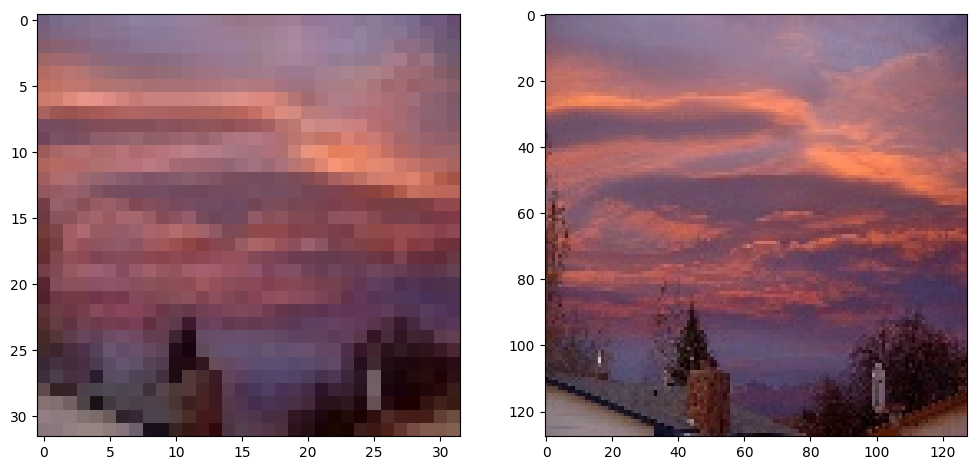

In [26]:
n=5000 # Only take a subset of dataset as the images will be involved in this tutorial (only take the first n images)
dataset_dir = "D:/AI_Master_New/Under_Local_Git_Covered/Deep_Learning_Tutorials_codebasics/Generative_Adversarial_Network_GAN/SRGAN_Tutorial12" # The directory to the dataset

lr_list = os.listdir(dataset_dir + "/lr_images")[:n] # Get the filename of first n low resolution images

lr_images = [] # Create an empty list to store the features of the low resolution images which will be involved in this tutorial

# Stores the features of the low resolution images which will be involved in this tutorial
for img in lr_list: 
    img_lr = cv2.imread(dataset_dir + "/lr_images/" + img)
    img_lr = cv2.cvtColor(img_lr, cv2.COLOR_BGR2RGB) # "cv2.COLOR_BGR2RGB" means convert the color space of the given image from BGR format into RGB format (because cv2 use BGR format to read an image)
    lr_images.append(img_lr) # append the features of a low resolution image at each iteration   


hr_list = os.listdir(dataset_dir + "/hr_images")[:n] # Get the filename of first n high resolution images
   
hr_images = [] # Create an empty list to store the features of the high resolution images which will be involved in this tutorial

# Stores the features of the high resolution images which will be involved in this tutorial
for img in hr_list:
    img_hr = cv2.imread(dataset_dir + "/hr_images/" + img)
    img_hr = cv2.cvtColor(img_hr, cv2.COLOR_BGR2RGB) # "cv2.COLOR_BGR2RGB" means convert the color space of the given image from BGR format into RGB format (because cv2 use BGR format to read an image)
    hr_images.append(img_hr) # append the features of a high resolution image at each iteration     

lr_images = np.array(lr_images) # Convert the features of the low resolution images which will be involved in this tutorial from PIL format into numpy array format (because cv2 read each image as a PIL format)
hr_images = np.array(hr_images) # Convert the features of the high resolution images which will be involved in this tutorial from PIL format into numpy array format (because cv2 read each image as a PIL format)

# Sanity check: Randonly select and view an image which will be involved in this tutorial
import random
import numpy as np
image_number = random.randint(0, len(lr_images)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(lr_images[image_number], (32, 32, 3)))
plt.subplot(122)
plt.imshow(np.reshape(hr_images[image_number], (128, 128, 3)))
plt.show()


# Data preprocessing

In [27]:
# Scale all pixel values into the range of [0,255]
lr_images = lr_images / 255.
hr_images = hr_images / 255.

# Split the images which will be involved in this tutorial into train set and test set (low resolution images are the feature, high resolution images are the target/ground truth)
lr_train, lr_test, hr_train, hr_test = train_test_split(lr_images, hr_images, test_size=0.33, random_state=42) 

# Create generator, discriminator, GAN, and VGG model before training the GAN model

In [28]:
hr_shape = (hr_train.shape[1], hr_train.shape[2], hr_train.shape[3]) # Define the shape of each high resolution image
lr_shape = (lr_train.shape[1], lr_train.shape[2], lr_train.shape[3]) # Define the shape of each low resolution image

lr_ip = Input(shape=lr_shape) # Define lr_ip is a model input layer that accepts each sample of dimension lr_shape and its data type.  
hr_ip = Input(shape=hr_shape) # Define hr_ip is a model input layer that accepts each sample of dimension hr_shape and its data type. 

# Create a generator network by calling the defined create_gen() to create a network that consists of 16 ResNet blocks and 1 input layer called lr_ip
generator = create_gen(lr_ip, num_res_block = 16)
generator.summary()

# Create a discriminator network by calling the defined create_disc() to create a network that consists of 1 output layer called hr_ip
discriminator = create_disc(hr_ip)
discriminator.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
discriminator.summary()

# Create a pretrained VGG network by calling the defined build_vgg() to create a network that accepts each input sample of dimension same as the ones of each high resolution image
vgg = build_vgg((hr_train.shape[1],hr_train.shape[2],hr_train.shape[3]))
print(vgg.summary())
vgg.trainable = False

# Create a GAN network by calling the defined create_comb(), using the created generator, discriminator, and VGG networks as well as high and low resolution images
gan_model = create_comb(generator, discriminator, vgg, lr_ip, hr_ip)

# 2 losses... adversarial loss and content (VGG) loss
# AdversariaL: is defined based on the probabilities of the discriminator over all training samples
# use binary_crossentropy

# Content: feature map obtained by the j-th convolution (after activation) 
# before the i-th maxpooling layer within the VGG19 network.
# MSE between the feature representations of a reconstructed image
# and the reference image. 
gan_model.compile(loss=["binary_crossentropy", "mse"], loss_weights=[1e-3, 1], optimizer="adam")
gan_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 64)   15616       input_1[0][0]                    
__________________________________________________________________________________________________
p_re_lu (PReLU)                 (None, 32, 32, 64)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   36928       p_re_lu[0][0]                    
______________________________________________________________________________________________

# Train the GAN model

In [ ]:
# Create a list of images for low resolution and high resolution in batches from which a batch of images would be fetched during training. 
batch_size = 1 # Here, we use batch size of 1, means only 1 image is fetched for training in a batch
train_lr_batches = [] # Create an empty list to store the low resolution images in batches later (inside this list, there can be multiple lists while each of them represents images of a batch)
train_hr_batches = [] # Create an empty list to store the high resolution images in batches later (inside this list, there can be multiple lists while each of them represents images of a batch)
for it in range(int(hr_train.shape[0] / batch_size)): # it refers to the batch index
    start_idx = it * batch_size
    end_idx = start_idx + batch_size
    train_hr_batches.append(hr_train[start_idx:end_idx]) # At each iteration, append a batch of high resolution images
    train_lr_batches.append(lr_train[start_idx:end_idx]) # At each iteration, append a batch of low resolution images
    
# The number of epochs for GAN training    
epochs = 5

# Enumerate training over epochs
for e in range(epochs):
    
    fake_label = np.zeros((batch_size, 1)) # Assign a label of 0 to all fake (generated images)
    real_label = np.ones((batch_size,1)) # Assign a label of 1 to all real images.
    
    #Create empty lists to populate gen and disc losses. 
    g_losses = []
    d_losses = []
    
    # Enumerate training over batches. 
    for b in tqdm(range(len(train_hr_batches))):
        lr_imgs = train_lr_batches[b] # Fetch a batch of low resolution images for training, at each iteration
        hr_imgs = train_hr_batches[b] # Fetch a batch of high resolution images for training, at each iteration
        
        #  Part 1: The created generator takes each low resolution image and generates its corresponding fake high resolution image
        fake_imgs = generator.predict_on_batch(lr_imgs) 
        
        # Part 2: Train the discriminator on fake and real high resolution images, by calculating the adversarial loss (d_loss) and then updating the weights and biases of the discriminator network
        discriminator.trainable = True
        d_loss_gen = discriminator.train_on_batch(fake_imgs, fake_label)
        d_loss_real = discriminator.train_on_batch(hr_imgs, real_label)
        
        # Average the discriminator loss, just for reporting purposes (will not be used to update the weights and biases of the discriminator). 
        d_loss = 0.5 * np.add(d_loss_gen, d_loss_real) 

        
        # Part 3: Train the generator by fixing discriminator as non-trainable
        discriminator.trainable = False
        
        # Using the VGG network to extract the feature map (features) of each real high resolution image, which will be used towards calculating the content loss (g_loss)
        image_features = vgg.predict(hr_imgs)
     
        # Train the generator via GAN. Remember that we have 2 losses (adversarial loss [using real_label as target to calculate] and content (VGG) loss [using image_features as target to calculate])
        g_loss, _, _ = gan_model.train_on_batch([lr_imgs, hr_imgs], [real_label, image_features])
        
        # Save losses to a list so we can average and report. 
        d_losses.append(d_loss)
        g_losses.append(g_loss)
        
    # Convert the list of losses to an array to make it easy to average    
    g_losses = np.array(g_losses)
    d_losses = np.array(d_losses)
    
    # Calculate the average losses for generator and discriminator
    g_loss = np.sum(g_losses, axis=0) / len(g_losses)
    d_loss = np.sum(d_losses, axis=0) / len(d_losses)
    
    # Report the progress during training, using average losses. 
    print("epoch:", e+1 ,"g_loss:", g_loss, "d_loss:", d_loss)

    if (e+1) % 10 == 0: # Change the frequency for model saving, if needed
        # Save the generator after every n epochs (Usually 10 epochs)
        generator.save("gen_e_"+ str(e+1) +".h5")

# Deploy the trained generator model to create super resolution image

In [ ]:
# Test - perform super resolution using saved generator model
from keras.models import load_model
from numpy.random import randint

# Loaded the trained generator model
generator = load_model('gen_e_10.h5', compile=False) # "compile=False" means after the model is loaded, it is set to non-trainable.

# Load the test set images
[X1, X2] = [lr_test, hr_test]

# Randomly select a test set image
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]

# Deploy the trained generator model to take the selected low resolution image and then generate its corresponding fake high resolution image
gen_image = generator.predict(src_image)

# Plot all three images (low resolution image(LR Image), fake high resolution image (Superresolution), real high resolution image (Orig. HR Image)) as a 2x3 subplot/grid
plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('LR Image')
plt.imshow(src_image[0,:,:,:])
plt.subplot(232)
plt.title('Superresolution')
plt.imshow(gen_image[0,:,:,:])
plt.subplot(233)
plt.title('Orig. HR Image')
plt.imshow(tar_image[0,:,:,:])

# Show the 2x3 subplot/grid
plt.show() 